<a href="https://colab.research.google.com/github/Udhay2898/Netflix_EDA/blob/Master/Nertflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Netflix_title.csv')
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2444,s2445,TV Show,Cardcaptor Sakura,NaN,"Miwa Matsumoto, Motoko Kumai, Nozomu Sasaki, H...",Japan,"June 1, 2020",1999,TV-Y7,2 Seasons,"Anime Series, International TV Shows",After a young girl breaks the seal of a magica...
2143,s2144,Movie,"Rob Schneider: Asian Momma, Mexican Kids",Tyler Spindel,Rob Schneider,United States,"August 11, 2020",2020,TV-MA,44 min,Stand-Up Comedy,"Former ""Saturday Night Live"" star Rob Schneide..."
4990,s4991,Movie,Stretch Armstrong: The Breakout,Victor Cook,"Scott Menville, Steven Yeun, Ogie Banks, Nazne...",United States,"March 13, 2018",2018,TV-Y7,104 min,Children & Family Movies,Villains are rampaging through Charter City an...


In [69]:
# Exploring Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [70]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [71]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [72]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [73]:
# Dropping unnecessary columns
df.drop(['show_id', 'description'], axis=1, inplace=True)

In [74]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [75]:
# Checking duplicates
df.duplicated().sum()

0

In [76]:
# Checking missing values

df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [77]:
# Data Cleaning

df.fillna({'cast':'NA'}, inplace=True)
df.fillna({'director':'Na'},inplace=True)
df.fillna({'country':'-'},inplace=True)
df.fillna({'rating':'-'},inplace=True)
df.fillna({'duration':'-'},inplace=True)
df.fillna({'date_added':'-'},inplace=True)

In [78]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [79]:
# Data Transformation
df.rename(columns={"listed_in":"categories"},inplace=True)

In [80]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Na,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [81]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,categories,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,September


In [82]:
# Data Visualization

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

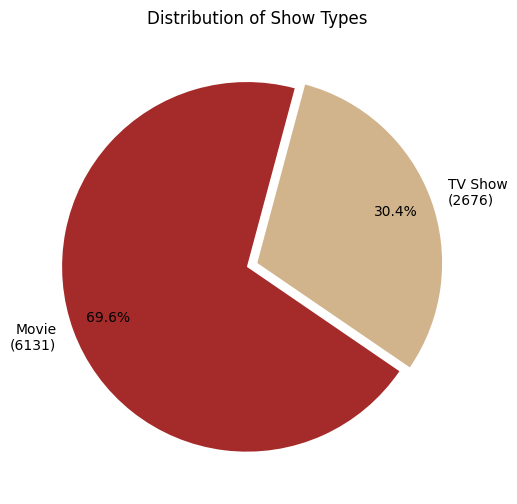

In [83]:
type_counts=df['type'].value_counts()

type_index=type_counts.index

# Create labels with counts
labels_with_counts = [f'{label}\n({count})' for label, count in zip(type_index, type_counts)]

colors = ["#A52A2A","#D2B48C"]

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels = labels_with_counts, autopct='%1.1f%%', startangle= 75, colors = colors,explode = (0.06, 0), pctdistance = 0.8)
plt.title('Distribution of Show Types')

plt.show()


In [84]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'categories', 'year_added',
       'month_added'],
      dtype='object')

In [85]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '-',
       'TV-Y7-FV', 'UR'], dtype=object)

In [86]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [87]:
rating_gr = df.groupby(['rating', 'type']).size().reset_index(name='count')

rating_gr_pivot = rating_gr.pivot_table(index = 'rating',columns = 'type',values = 'count',fill_value = 0)
rating_gr_pivot.max()

type
Movie      2062.0
TV Show    1145.0
dtype: float64

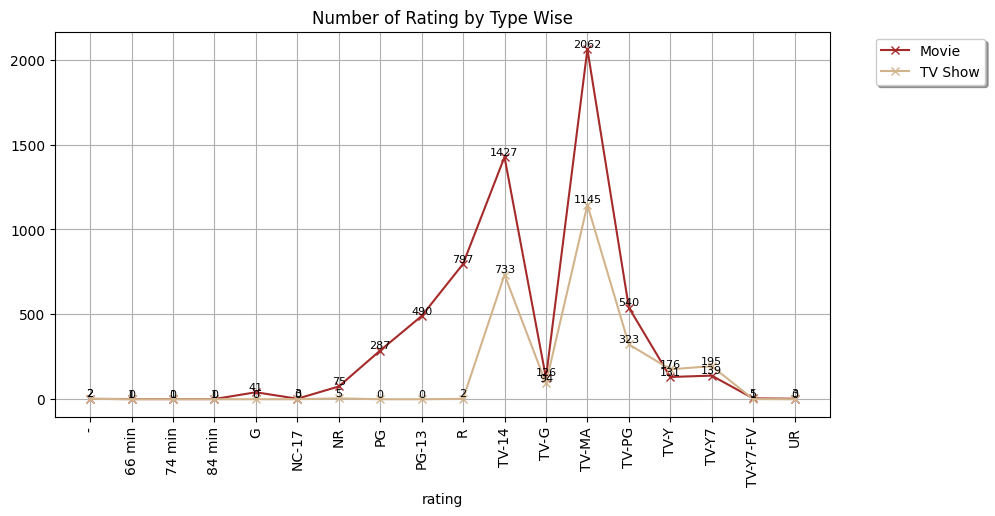

In [88]:
ax = rating_gr_pivot.plot.line(figsize=(10, 5), marker='x', grid=True, color=colors)

# Add data labels
for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(
            x,                             # X position
            y + 0.1,                       # Y position (just above the line)
            f'{int(y)}',                  # Label text
            ha='center',                  # Horizontal alignment
            va='bottom',                  # Vertical alignment
            fontsize=8,                  # Font size
            rotation=0,                   # Rotate text by 90 degrees
            color = '#000000'             #Color
        )

# Customize x-ticks
tick = range(len(rating_gr_pivot))
plt.xticks(ticks=tick, labels=rating_gr_pivot.index, rotation=90)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Number of Rating by Type Wise')

# Show plot
plt.show()

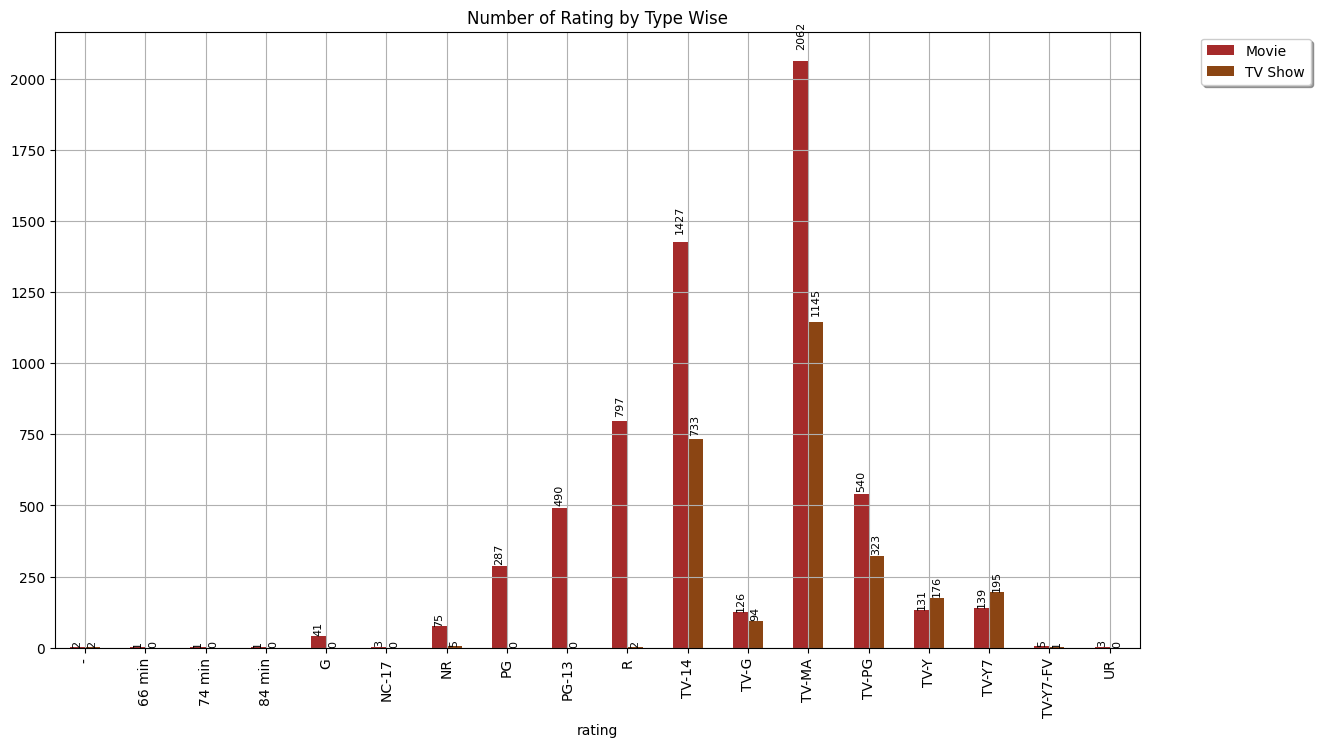

In [95]:
ax = rating_gr_pivot.plot.bar(figsize=(14, 8), grid=True, color=colors)

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = f'{int(height)}'
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height + 0.02 * height,             # Y position (slightly above the bar)
            label,                              # Label text
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8,                        # Font size
            rotation=90                         # Rotate text by 90 degrees
        )

# Customize x-ticks
tick = range(len(rating_gr_pivot))
plt.xticks(ticks=tick, labels=rating_gr_pivot.index, rotation=90)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Number of Rating by Type Wise')

# Show plot
plt.show()

In [94]:
# Extract the count of each unique director and select the top 10 directors, excluding 'NA'
df = df[df['director'] != 'Na']
top_directors = df['director'].value_counts().nlargest(10).reset_index()
top_directors.columns = ['Director', 'Count']

# Define colors
colors = ["#A52A2A", "#8B4513", "#D2B48C", "#F4A460", "#DEB887", "#6F4F28", "#A0522D", "#C69C6D", "#D2691E", "#8B4513"]

# Create donut chart
fig = go.Figure(data=[go.Pie(
    labels=top_directors['Director'],
    values=top_directors['Count'],
    hole=0.3,
    marker=dict(colors=colors),
    hoverinfo='label+percent+value',
    textinfo='label+percent',
)])


fig.update_layout(
    title_text='Top 10 Directors by Count',
    annotations=[dict(text='Directors', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()